In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/adult-census-income/adult.csv


Exploratory Data Analysis :- **Adult Census data Analysis**

***Objective:***

1) There is any relationship between Gender and income.

2) If there is any association , then is it positive or negative.

3) Check the fact that men are earning more money than female

Prediction 

**Objective**

Predict whether income exceed 50K/ yr based on Census Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
import csv

In [3]:
census_data = pd.read_csv('../input/adult-census-income/adult.csv')
census_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Checking any null value in the dataframe

In [4]:
census_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Following is summary table of continous variable of DataFrame, Which contain following information:

1) Number of observation in each column

2) Average , minimum and maximumm value of each column

3) first , second and third quartile

In [5]:
census_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Renaming columns name as well as replacing value of pariticular columns.

In [7]:
census_data.workclass = census_data.workclass.replace({'?':'Not-Known'})
census_data.occupation = census_data.occupation.replace({'?':'Not-Known'})
census_data = census_data.rename(columns = {'education.num':'education_num'})
census_data = census_data.rename(columns ={'marital.status':'marital_status'})
census_data = census_data.rename(columns ={'capital.gain':'capital_gain'})
census_data = census_data.rename(columns ={'capital.loss':'capital_loss'})
census_data = census_data.rename(columns = {'hours.per.week':'hours_per_week'})
census_data = census_data.rename(columns ={'native.country':'native_country'})
census_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Not-Known,77053,HS-grad,9,Widowed,Not-Known,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Not-Known,186061,Some-college,10,Widowed,Not-Known,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Following is graphical distribution of various columns of data set.

Text(0.5, 1.0, 'Gender')

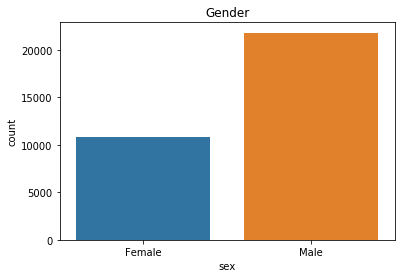

In [8]:
sns.countplot(x = 'sex',data = census_data)
plt.title("Gender")

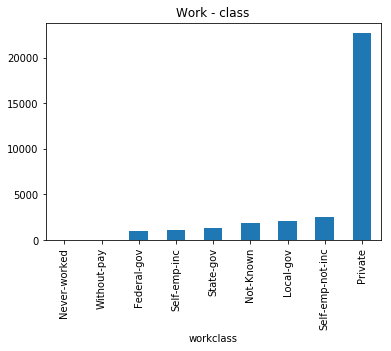

In [9]:
census_data4 =census_data.groupby('workclass').sex.count().sort_values()
plt.title('Work - class')
census_data4.plot.bar()

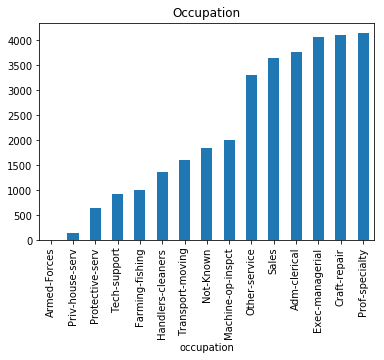

In [10]:
census_data5 =census_data.groupby('occupation').sex.count().sort_values()
plt.title('Occupation')
census_data5.plot.bar()

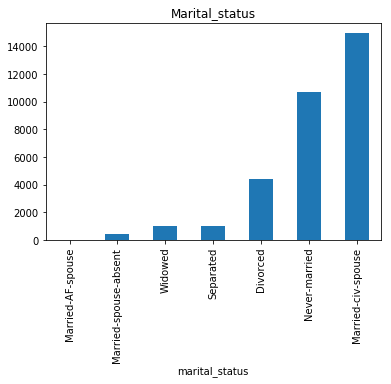

In [11]:
census_data6 =census_data.groupby('marital_status').sex.count().sort_values()
plt.title('Marital_status')
census_data6.plot.bar()

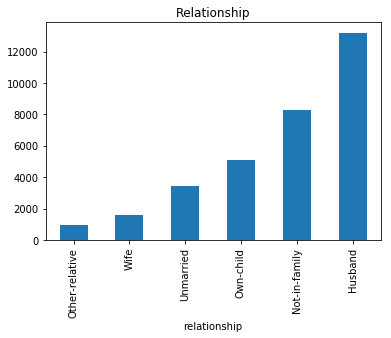

In [12]:
census_data7 =census_data.groupby('relationship').sex.count().sort_values()
plt.title('Relationship')
census_data7.plot.bar()

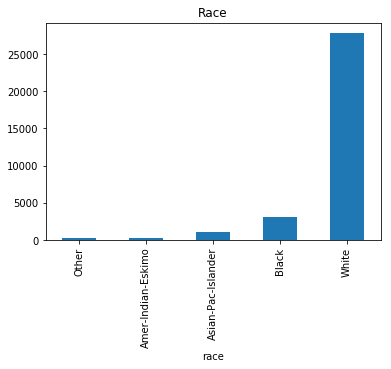

In [13]:
census_data8 =census_data.groupby('race').sex.count().sort_values()
plt.title('Race')
census_data8.plot.bar()

Doing statistical chisquare test to check association between Gender and income 

Hypothesis 

Null hypothesis **Ho = There is no association between Gender and income**

Vs Alternative hypothesis **H1 = There is association**

In [14]:
census_data9 = pd.crosstab(census_data.sex , census_data.income)
print("Following is contigency table")
census_data9

Following is contigency table


income,<=50K,>50K
sex,,
Female,9592,1179
Male,15128,6662


In [15]:
a1 = [9592,1179]
a2 = [15128,6662]

a3 = np.array([a1,a2])

from scipy import stats
stats.chi2_contingency(a3)

chi2_stat, p_val, dof, ex = stats.chi2_contingency(a3)
print("Chisquare test value is : ",chi2_stat)
print("\nDegree of freedom is : ",dof)
print("\nP-Value is : ",p_val)
print("\nExpected observation contiggency table\n")
print(ex)

Chisquare test value is :  1517.813409134445

Degree of freedom is :  1

P-Value is :  0.0

Expected observation contiggency table

[[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


Since from above result , 

Chisquare value is greater than p-value so we reject H0 and conclude that there is association between Gender and income.

**Objective 1 is completed.**

Now we checking second objective, whether it is positive or negative association.

*To check Positive or negative association, We use concepts as follow,*

Gender has two level a1 = Female and a2 = Male. Income has two level b1 = '<=50K' and b2 = '>50k'

then following is formula is used to find association

**for positive association  (a1b1) > ((a1)(b1))/N**

**for negative association (a1b1) < ((a1)(b1))/N**


where,

(a1b1) = Number of Female earning less than <=50K
(a1) = Total number of Female observation
(b1) = Total number of observation earning less than <=50K
N = Total number of observations


In [16]:
x,y,z = a3[0][1]+a3[0][0],a3[1][1]+a3[1][0],a3[0][0]+a3[1][0]+a3[0][1]+a3[1][1]
print('Number of female earning less than <=50K is ',a3[0][0])
print('Number of female observation is ',a3[0][1]+a3[0][0])
print('Number of male ',a3[1][1]+a3[1][0])
print('Total observation is ',a3[0][0]+a3[1][0]+a3[0][1]+a3[1][1])
print("Value of evaluation metric is ",((x*y)/z))

Number of female earning less than <=50K is  9592
Number of female observation is  10771
Number of male  21790
Total observation is  32561
Value of evaluation metric is  7208.012346058168


From above result, (a1b1) > (a1)(b1)/N hence it is positive association. 

Hence our second objective is also completed.

Now we will check third objective that is, does man earning more monery than female

Following is gender , incomewise percent distribution

In [17]:
census_data10 = (census_data.groupby(['sex','income']).workclass.count()/census_data.groupby(['sex']).workclass.count())*100
census_data10

sex     income
Female  <=50K     89.053941
        >50K      10.946059
Male    <=50K     69.426342
        >50K      30.573658
Name: workclass, dtype: float64

From above result , 

20% more female is earning <=50K than male, while 20%  more male is earning >50K than female.

This revealed the fact that Male make more money than female if income >50K while Female make more money if income <=50K.

In [18]:
census_data11 = (census_data.groupby(['sex','income','workclass']).workclass.count()/census_data.groupby(['sex','income']).workclass.count())*100
census_data11

sex     income  workclass       
Female  <=50K   Federal-gov          2.700167
                Local-gov            7.099666
                Never-worked         0.020851
                Not-Known            8.204754
                Private             73.248540
                Self-emp-inc         0.979983
                Self-emp-not-inc     3.304837
                State-gov            4.389074
                Without-pay          0.052127
        >50K    Federal-gov          4.749788
                Local-gov           13.061917
                Not-Known            4.410517
                Private             61.577608
                Self-emp-inc         3.477523
                Self-emp-not-inc     6.955047
                State-gov            5.767600
Male    <=50K   Federal-gov          2.181386
                Local-gov            5.255156
                Never-worked         0.033051
                Not-Known            5.671602
                Private             70.776044
 

Now we go one step more , Here is analysis

In [19]:
census_data11 = (census_data.groupby(['sex','income','marital_status']).workclass.count()/census_data.groupby(['sex','income']).workclass.count())*100
census_data11

sex     income  marital_status       
Female  <=50K   Divorced                 25.990409
                Married-AF-spouse         0.083403
                Married-civ-spouse        9.414095
                Married-spouse-absent     2.022519
                Never-married            47.967056
                Separated                 6.401168
                Widowed                   8.121351
        >50K    Divorced                 15.182358
                Married-AF-spouse         0.508906
                Married-civ-spouse       63.952502
                Married-spouse-absent     0.932994
                Never-married            14.079729
                Separated                 1.441900
                Widowed                   3.901612
Male    <=50K   Divorced                  9.829455
                Married-AF-spouse         0.033051
                Married-civ-spouse       48.790323
                Married-spouse-absent     1.255949
                Never-married            36.

From above results,

3% more number of private female employees is earning <=50K than male,while only 2% more number of more private male employee is earning >50K than female.

More divorced and unmarried female is earning <=50K than male , While More Male married-civ-spouse is earning >50K than Female.

---------------------------------------  END OF EDA  ----------------------------------------------

**Objective**

Predicting whether income exceed 50K/yr based on census data

In [20]:
census_data_v1 = census_data
census_data_v1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Not-Known,77053,HS-grad,9,Widowed,Not-Known,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Not-Known,186061,Some-college,10,Widowed,Not-Known,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [21]:
dummy = pd.get_dummies(census_data_v1['workclass'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['workclass'],axis = 1)
dummy = pd.get_dummies(census_data_v1['education'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['education'],axis = 1)
dummy = pd.get_dummies(census_data_v1['marital_status'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['marital_status'],axis = 1)
dummy = pd.get_dummies(census_data_v1['occupation'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['occupation'],axis = 1)
dummy = pd.get_dummies(census_data_v1['relationship'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['relationship'],axis = 1)
dummy = pd.get_dummies(census_data_v1['race'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['race'],axis = 1)
dummy = pd.get_dummies(census_data_v1['sex'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['sex'],axis = 1)
dummy = pd.get_dummies(census_data_v1['native_country'])
census_data_v1 = pd.concat([census_data_v1 ,dummy],axis = 1)
census_data_v1 = census_data_v1.drop(['native_country'],axis = 1)

In [22]:
X = census_data_v1[census_data_v1.columns.difference(['income'])]
y = census_data_v1['income']
y = y.replace('>50K',1)
y = y.replace('<=50K',0)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import mean_squared_error

In [24]:
X_train,val_X,y_train,val_y = train_test_split(X,y,test_size = 0.2,random_state = 0)
census_data_model = RandomForestClassifier(n_estimators = 500,bootstrap = True,max_features = 'sqrt')
census_data_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
print("Average absolute error value is " ,mean_absolute_error(val_y,census_data_model.predict(val_X)))
print("Average error square value is" ,mean_squared_error(val_y,census_data_model.predict(val_X)))
print("Root mean square error value is",np.sqrt(mean_squared_error(val_y,census_data_model.predict(val_X))))

Average absolute error value is  0.1441731920773837
Average error square value is 0.1441731920773837
Root mean square error value is 0.379701451244769


In [26]:
y_pred_test = census_data_model.predict_proba(val_X)[:,1]
y_pred_train = census_data_model.predict_proba(X_train)[:,1]

In [27]:
from sklearn.metrics import roc_auc_score,average_precision_score,auc,roc_curve,precision_recall_curve

ROC Curve


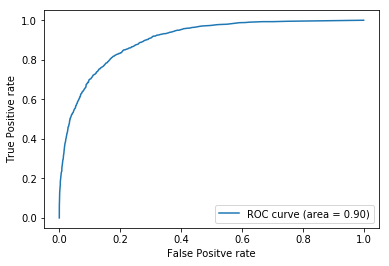

In [28]:
print("ROC Curve")
fpr , tpr ,thresold = roc_curve(val_y,y_pred_test)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,label = 'ROC curve (area = %0.2f)'% roc_auc)
plt.xlabel("False Positve rate")
plt.ylabel("True Positive rate")
plt.legend(loc = 'lower right')

Precision Vs Recall Plot


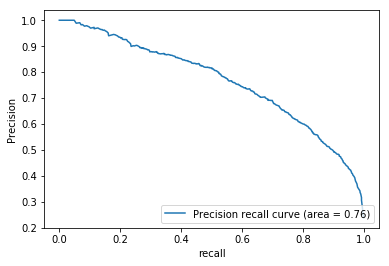

In [29]:
print("Precision Vs Recall Plot")
precision , recall , threshold = precision_recall_curve(val_y,y_pred_test)
average_precision =  average_precision_score(val_y,y_pred_test)
plt.plot(recall,precision,label = 'Precision recall curve (area = %0.2f)'% average_precision)
plt.xlabel("recall")
plt.ylabel("Precision")
plt.legend(loc = 'lower right')

In [30]:
max(y_pred_test[(y_pred_test >= 0.7) & (y_pred_test < 0.8)])

0.798

In [31]:
y_pred_test = np.where(y_pred_test > 0.798,1,0)
y_pred_train = np.where(y_pred_train > 0.798,1,0)

Confusion Matrix using test values


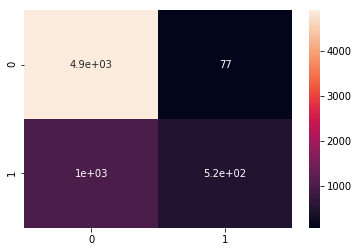

In [32]:
print("Confusion Matrix using test values")
matrix = confusion_matrix(val_y,y_pred_test)
sns.heatmap(matrix ,annot = True,cbar = True)

Confusion Matrix using train values


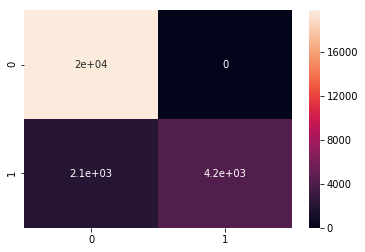

In [33]:
print("Confusion Matrix using train values")
matrix = confusion_matrix(y_train,y_pred_train)
sns.heatmap(matrix ,annot = True,cbar = True)

In [34]:
print("Following is Actual and predicted value table")
prediction_data = pd.DataFrame(val_X['age'])
prediction_data['Predicted_value'] = y_pred_test
prediction_data['Actual_value'] = val_y
prediction_data = prediction_data.sort_index(axis = 0)
prediction_data

Following is Actual and predicted value table


,age,Predicted_value,Actual_value
4,41,0,0
6,38,0,0
7,74,0,1
18,22,0,1
22,61,0,0
...,...,...,...
32549,43,0,0
32556,22,0,0
32558,40,0,1
32559,58,0,0


In [35]:
prediction_data_v1 = pd.crosstab(prediction_data.Predicted_value , prediction_data.Actual_value)
print("Following is contigency table")
prediction_data_v1

Following is contigency table


Actual_value,0,1
Predicted_value,,
0,4889,1031
1,77,516


In [36]:
import numpy as np

In [37]:
a1 = [4892,1015]
a2 = [74,532]

a3 = np.array([a1,a2])
print("recall is ",(a3[0][0])/(a3[0][0]+a3[1][0]))
print("precision is ",(a3[0][0])/(a3[0][0]+a3[0][1]))

recall is  0.9850986709625453
precision is  0.8281699678347723


In [38]:
print("Number of wrong prediction is ",prediction_data[prediction_data['Predicted_value'] != prediction_data['Actual_value']].Predicted_value.count()," out of total ",prediction_data['Predicted_value'].count(),"\nAnd Percentage of wrong prediction is ",round(prediction_data[prediction_data['Predicted_value'] != prediction_data['Actual_value']].Predicted_value.count()/prediction_data['Predicted_value'].count(),4),"\nNote Yes = 1 and No = 0 ")

Number of wrong prediction is  1108  out of total  6513 
And Percentage of wrong prediction is  0.1701 
Note Yes = 1 and No = 0 
